In [11]:
import sys
sys.path.append('../')

from src.nn.linear import Linear
from src.nn.functional import ReLU, Softmax, MSELoss
from src.optim.optim import SGD
from src.utils.template import BaseClass
from src.utils.dataset import MnistDataset
from src.utils.trainer import Trainer

import torch
from torch import nn
from torch.utils.data import DataLoader

import numpy as np

import random
import matplotlib.pyplot as plt

%matplotlib inline

In [12]:
training_images_filepath = "/home/tim/repos/hse-mlp-implementation/data/train-images.idx3-ubyte" #join(local_path, input_folder, 'train-images-idx3-ubyte')
training_labels_filepath = "/home/tim/repos/hse-mlp-implementation/data/train-labels.idx1-ubyte" #join(local_path, input_folder, 'train-labels-idx1-ubyte')
test_images_filepath = "/home/tim/repos/hse-mlp-implementation/data/t10k-images.idx3-ubyte" #join(local_path, input_folder, 't10k-images-idx3-ubyte')
test_labels_filepath = "/home/tim/repos/hse-mlp-implementation/data/t10k-labels.idx1-ubyte" #join(local_path, input_folder, 't10k-labels-idx1-ubyte')

mnist_train = MnistDataset(training_images_filepath, training_labels_filepath)
mnist_test = MnistDataset(test_images_filepath, test_labels_filepath)

In [13]:
class MLP(BaseClass):
    def __init__(self, input_size, output_size, hidden_size):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size = hidden_size
        
        self.layers = [
            Linear(input_size, hidden_size),
            ReLU(), 
            Linear(hidden_size, output_size),
            Softmax()
        ]

    def forward(self, x: np.ndarray) -> np.ndarray:
        assert len(self.layers) > 0
        for layer in self.layers:
            x = layer(x)
        return x

In [14]:
train_dataloader = DataLoader(mnist_train, batch_size=64, shuffle=True)
test_dataloader = DataLoader(mnist_test, batch_size=1)

In [15]:
input_shape = next(iter(train_dataloader))[0].shape[1]
model = MLP(input_size=input_shape, output_size=mnist_train.CLASSES, hidden_size=512)

In [16]:
optimizer = SGD(learning_rate=0.001)
criterion = MSELoss()

In [17]:
trainer_config = {
    "model": model, 
    "optimizer": optimizer, 
    "criterion": criterion, 
    "do_train": True,
    "do_eval": True,
    "epochs": 15, 
    "batch_size": 64,
    "eval_metric": "accuracy"
}

Epoch 0: 100%|██████████| 938/938 [00:08<00:00, 110.68it/s]


Train Loss: 0.013418569067243738
Eval loss: 0.007808531914450715
Eval metric: 0.95


Epoch 1: 100%|██████████| 938/938 [00:08<00:00, 111.55it/s]


Train Loss: 0.00519584535229425
Eval loss: 0.0067359446007524805
Eval metric: 0.9568


Epoch 2: 100%|██████████| 938/938 [00:07<00:00, 119.10it/s]


Train Loss: 0.003308296930085714
Eval loss: 0.005533800779441153
Eval metric: 0.9642


Epoch 3: 100%|██████████| 938/938 [00:07<00:00, 123.36it/s]


Train Loss: 0.002301710391143631
Eval loss: 0.005532984625576431
Eval metric: 0.9649


Epoch 4: 100%|██████████| 938/938 [00:07<00:00, 119.99it/s]


Train Loss: 0.0015654257454598833
Eval loss: 0.005208496747461924
Eval metric: 0.9673


Epoch 5: 100%|██████████| 938/938 [00:07<00:00, 123.00it/s]


Train Loss: 0.001115926354892198
Eval loss: 0.0050826314927151514
Eval metric: 0.9681


Epoch 6: 100%|██████████| 938/938 [00:07<00:00, 133.79it/s]


Train Loss: 0.0007057757899042132
Eval loss: 0.004660290156752044
Eval metric: 0.9711


Epoch 7: 100%|██████████| 938/938 [00:07<00:00, 131.00it/s]


Train Loss: 0.0004821310646655603
Eval loss: 0.005021913321477049
Eval metric: 0.9685


Epoch 8: 100%|██████████| 938/938 [00:07<00:00, 133.59it/s]


Train Loss: 0.0003091072819061209
Eval loss: 0.004566026398712162
Eval metric: 0.9714


Epoch 9: 100%|██████████| 938/938 [00:07<00:00, 127.58it/s]


Train Loss: 0.00020532257738991512
Eval loss: 0.004487802454766592
Eval metric: 0.9725


Epoch 10: 100%|██████████| 938/938 [00:07<00:00, 126.51it/s]


Train Loss: 0.0001152865224094132
Eval loss: 0.0044182315823432525
Eval metric: 0.973


Epoch 11: 100%|██████████| 938/938 [00:07<00:00, 126.33it/s]


Train Loss: 7.130651076896152e-05
Eval loss: 0.004529812206226799
Eval metric: 0.972


Epoch 12: 100%|██████████| 938/938 [00:07<00:00, 128.66it/s]


Train Loss: 5.146912560685932e-05
Eval loss: 0.004485697017297141
Eval metric: 0.9727


Epoch 13: 100%|██████████| 938/938 [00:07<00:00, 125.02it/s]


Train Loss: 2.8652221046017834e-05
Eval loss: 0.004379786299830868
Eval metric: 0.9731


Epoch 14: 100%|██████████| 938/938 [00:07<00:00, 128.53it/s]


Train Loss: 1.945654160068258e-05
Eval loss: 0.00441071280536499
Eval metric: 0.9731


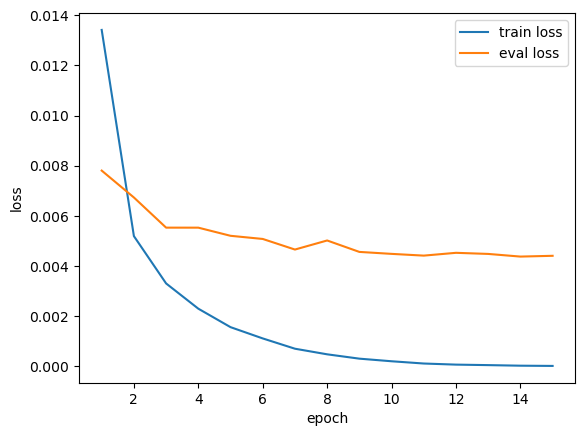

In [18]:
trainer = Trainer(**trainer_config)
trainer.train(train_data=train_dataloader, eval_data=test_dataloader)